In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [3]:
train_set = datasets.MNIST(root = "", 
                          train = True,
                          transform = transforms.ToTensor(),
                           download = True)


Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw




Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw




Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw




Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw



C:\Users\prana\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
test_set = datasets.MNIST(root = "",
                         download = True,
                         train = False,
                         transform = transforms.ToTensor())

In [6]:
train_set.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [7]:
train_set.data.shape

torch.Size([60000, 28, 28])

In [8]:
test_set.data.shape

torch.Size([10000, 28, 28])

In [9]:
train_set

Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: ToTensor()

In [10]:
test_set

Dataset MNIST
    Number of datapoints: 10000
    Root location: 
    Split: Test
    StandardTransform
Transform: ToTensor()

In [11]:
train_loader = DataLoader(train_set, batch_size = 64, shuffle=True)

In [12]:
test_loader = DataLoader(test_set, batch_size = 64, shuffle = False)

In [16]:
for images, labels in train_loader:
    print(images.shape)
    print(labels.shape)
    break

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [21]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(images.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [23]:
images[10].shape

torch.Size([1, 28, 28])

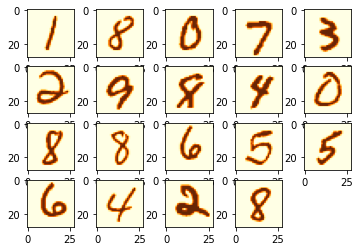

In [32]:
figure = plt.figure
num_img = 20

for img in range(1, num_img):    plt.subplot(4,5,img)
    plt.imshow(images[img].numpy().squeeze(),cmap='YlOrBr')

In [36]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
    
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128,68)
        self.fc4 = nn.Linear(68,10)
        
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()
    
    def forward(self, img):
        out = img.view(-1, 28*28)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        
        return out
    

In [38]:
model = ANN()
print(model.parameters)

<bound method Module.parameters of ANN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=68, bias=True)
  (fc4): Linear(in_features=68, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=None)
)>


In [43]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)

In [59]:
epochs = 15

training_loss = []
training_acc = []
testing_loss = []
testing_acc = []

for epoch in range(epochs):
    
    train_loss = 0.0
    train_acc = 0.0
    
    model.train()
    for images, labels in train_loader:
        
        optimizer.zero_grad()
        output = model(images)
        loss = loss_fn(output, labels)
        
        loss.backward()
        optimizer.step()
        
        predictions = torch.argmax(output,1)
        
        train_acc += (predictions == labels).sum().item()
        train_loss += loss.item()
        
    training_acc.append(train_acc/len(train_set))
    training_loss.append(train_loss/len(train_loader))
    
    test_acc = 0.0
    test_loss = 0.0
    
    model.eval()
    
    with torch.no_grad():
        for images, labels in test_loader:
            output = model(images)
            loss = loss_fn(output, labels)
            predictions = torch.argmax(output,1)
            
            test_acc += (predictions == labels).sum().item()
            test_loss += loss.item()
    
    testing_acc.append(test_acc/len(test_set))
    testing_loss.append(test_loss/len(test_loader))
    
    print("Epochs: {} , Training Accuracy: {:.2f} , Training Loss: {:.2f} , Testing Accuracy: {:.2f} , Testing Loss: {:.2f} ".format(
    epoch+1, train_acc/len(train_set),train_loss/len(train_loader),test_acc/len(test_set),test_loss/len(test_loader) ))
        
        
    

Epochs: 1 , Training Accuracy: 0.12 , Training Loss: 2.29 , Testing Accuracy: 0.13 , Testing Loss: 2.29 
Epochs: 2 , Training Accuracy: 0.14 , Training Loss: 2.29 , Testing Accuracy: 0.15 , Testing Loss: 2.28 
Epochs: 3 , Training Accuracy: 0.17 , Training Loss: 2.28 , Testing Accuracy: 0.19 , Testing Loss: 2.27 
Epochs: 4 , Training Accuracy: 0.27 , Training Loss: 2.27 , Testing Accuracy: 0.33 , Testing Loss: 2.26 
Epochs: 5 , Training Accuracy: 0.37 , Training Loss: 2.26 , Testing Accuracy: 0.38 , Testing Loss: 2.25 
Epochs: 6 , Training Accuracy: 0.39 , Training Loss: 2.24 , Testing Accuracy: 0.39 , Testing Loss: 2.22 
Epochs: 7 , Training Accuracy: 0.39 , Training Loss: 2.20 , Testing Accuracy: 0.38 , Testing Loss: 2.18 
Epochs: 8 , Training Accuracy: 0.38 , Training Loss: 2.15 , Testing Accuracy: 0.37 , Testing Loss: 2.10 
Epochs: 9 , Training Accuracy: 0.39 , Training Loss: 2.05 , Testing Accuracy: 0.40 , Testing Loss: 1.98 
Epochs: 10 , Training Accuracy: 0.44 , Training Loss: 1

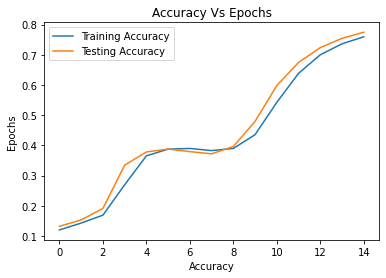

In [64]:
plt.title("Accuracy Vs Epochs")
plt.plot(range(epochs), training_acc, label = "Training Accuracy")
plt.plot(range(epochs), testing_acc, label = "Testing Accuracy")
plt.legend()
plt.xlabel("Accuracy")
plt.ylabel("Epochs")
plt.show()

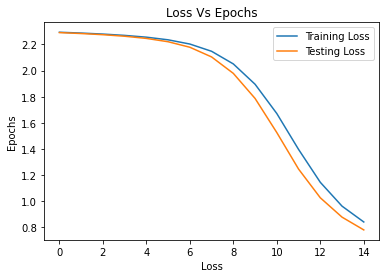

In [63]:
plt.title("Loss Vs Epochs")
plt.plot(range(epochs), training_loss, label = "Training Loss")
plt.plot(range(epochs), testing_loss, label = "Testing Loss")
plt.legend()
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.show()